# Monte Carlo simulation

In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

# Collect Investments Data Using Alpaca

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [1]:
# Format current date as ISO format
today = pd.Timestamp("2022-02-04", tz="America/New_York").isoformat()

# Set the tickers
ticker = [tickers]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset(
    ticker,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

NameError: name 'pd' is not defined

In [9]:
df_closing_prices = pd.DataFrame()
df_closing_prices["NVDA"] = df_portfolio["NVDA"]["close"]

df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,NVDA
2022-02-04,243.13


In [10]:
nvda_close_price = df_closing_prices["NVDA"][0]
nvda_close_price

243.13

## Simulation

In [12]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-02-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-02-04', tz='America/New_York').isoformat()

In [13]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

NVDA                                    
                              open      high     low   close    volume
time                                                                  
2018-02-14 00:00:00-05:00  231.000  242.5925  230.55  241.42  14776106
2018-02-15 00:00:00-05:00  244.785  248.3700  241.52  246.50  14361577
2018-02-16 00:00:00-05:00  245.680  250.0000  243.47  243.84  12728694
2018-02-20 00:00:00-05:00  244.880  251.8700  242.20  249.07  13321680
2018-02-21 00:00:00-05:00  251.720  251.9675  241.36  241.51  16505012

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)


df_stock_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

NVDA                                    
                              open      high     low   close    volume
time                                                                  
2018-02-14 00:00:00-05:00  231.000  242.5925  230.55  241.42  14776106
2018-02-15 00:00:00-05:00  244.785  248.3700  241.52  246.50  14361577
2018-02-16 00:00:00-05:00  245.680  250.0000  243.47  243.84  12728694
2018-02-20 00:00:00-05:00  244.880  251.8700  242.20  249.07  13321680
2018-02-21 00:00:00-05:00  251.720  251.9675  241.36  241.51  16505012

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

NVDA                                      \
                              open      high     low   close    volume   
time                                                                     
2018-02-14 00:00:00-05:00  231.000  242.5925  230.55  241.42  14776106   
2018-02-15 00:00:00-05:00  244.785  248.3700  241.52  246.50  14361577   
2018-02-16 00:00:00-05:00  245.680  250.0000  243.47  243.84  12728694   
2018-02-20 00:00:00-05:00  244.880  251.8700  242.20  249.07  13321680   
2018-02-21 00:00:00-05:00  251.720  251.9675  241.36  241.51  16505012   

                                        
                          daily_return  
time                                    
2018-02-14 00:00:00-05:00          NaN  
2018-02-15 00:00:00-05:00     0.021042  
2018-02-16 00:00:00-05:00    -0.010791  
2018-02-20 00:00:00-05:00     0.021448  
2018-02-21 00:00:00-05:00    -0.030353

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/patrickthornquist/FinTech/Project 1/Stock-Dashboard-Viewer/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980213,1.006112,0.969246,1.017767,0.965634,0.932066,1.030803,0.929954,0.982025,1.027746,...,1.035790,0.960370,0.973835,1.086807,0.990133,0.994074,1.011374,1.058909,0.953401,1.044495
2,0.958293,1.018377,0.904393,1.018405,0.939308,0.914802,1.050944,0.900496,0.957146,0.965010,...,1.049200,0.938013,0.984022,1.090919,1.009081,0.996168,0.973762,1.060798,0.911045,1.041720
3,0.946784,1.052954,0.935189,1.024950,1.007406,0.897166,1.009995,0.931230,0.914252,0.934779,...,1.025636,0.940712,0.942089,1.053865,0.981714,1.023351,1.003334,1.036025,0.881921,0.970792
4,0.964009,1.033385,0.974631,1.019153,0.962681,0.904750,1.054697,0.904591,0.900068,1.000406,...,1.033764,0.956574,0.930975,1.026659,1.040388,1.034298,1.001024,1.030523,0.850348,0.986650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.537515,523.714120,117.282153,3.573120,219.181722,199.362337,1.506987,0.174900,30.156995,281.287116,...,6.810709,34304.514418,83.524615,66.245330,26.684592,32.832909,247.306130,4.991173,3.547023,50.755212
7557,15.518521,557.972603,118.850556,3.608812,218.939820,200.053213,1.590300,0.182538,30.081215,292.871350,...,7.230729,34222.588130,84.029241,62.594061,25.289563,32.420882,235.324445,4.959451,3.675891,52.770674
7558,15.066311,526.011840,124.658996,3.475635,227.133655,201.461838,1.599296,0.173467,30.866584,274.992940,...,7.051734,33869.971860,80.797928,65.588222,26.430105,32.742868,229.736994,4.930048,3.594741,53.268794
7559,15.664796,513.119242,120.430157,3.603792,225.336489,197.755486,1.595237,0.181264,29.886816,264.157363,...,6.649451,34109.962903,78.372494,61.104159,25.649125,34.049177,233.120187,5.214400,3.500314,55.041876


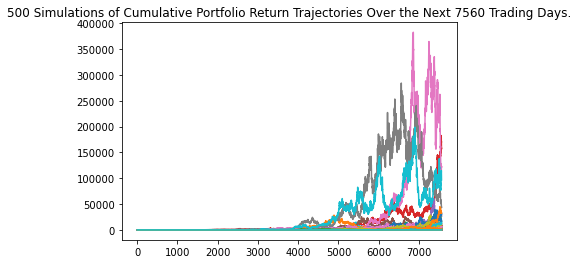

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()